Team Members(All 5000): Max Link, Alex Chen, Pablo Arroliga

**Business Understanding(1.5 pts):**

We chose a diabetes prediction dataset. It consists of patients' data with diabetes related features (Such as bmi and hypertension) that affect patients' diabetes status along with the diabetes result (Positive or negative).

The purpose of the data set is to evaluate how much impact each feature affects the status of diabetes, the data is collected through 100000 patients, we found this dataset on kaggle.

The prediction task is to predict the diabetes status of the patient (positive or negative). Third parties, especially in the medical industry, will be interested in the data because they want to know what causes diabetes, and they can learn how much each factor affects diabetes.


If we are marketing towards 3rd parties in the medical industry, then our prediction algorithm will need to be above 80.2% accuracy to be useful to these third parties, since the best diabetes prediction model in medical industry is 80.2% (Based on Google).




**Data Understanding(3 pts):**

**Part 1(1.5pts):**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data from kaggle
df=pd.read_csv("diabetes_prediction_dataset.csv")
#show data types before cleaning
df.info()

# Convert numeric continous data (data in a range)-age, bmi, HbA1c_level, and blood_glucose_level to Categorical data
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['bmi'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

bins = [3, 4, 5, 6, 7, 8, 9, 10]
labels = ['3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
df['HbA1c_level'] = pd.cut(df['HbA1c_level'], bins=bins, labels=labels, right=False)

bins = [80, 124, 168, 212, 256, 300,344]
labels = ['80-124', '124-168','168-212','212-256','256-300','300-344']
df['blood_glucose_level'] = pd.cut(df['blood_glucose_level'], bins=bins, labels=labels, right=False)

#show data types after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  object  
 1 

NOTE: Put the datatypes for each attribute in parenthesis.

Based on the table data above, we have 9 attributes. The attributes are gender (categorical), age (categorical),	hypertension (categorical), heart_disease (categorical),	smoking_history (categorical), bmi (categorical), HbA1c_level(categorical), blood_glucose_level(categorical),	diabetes (categorical). Although 5 of the data type does not say it is categorical, the data in them is actually categorical. For instance, diabetes is listed as int64, but it only contains 0 and 1, which means negative and positive.

Gender - Maybe men have a higher chance of getting diabetes because of different hormones than women?

Age - Maybe older people have a higher chance of being diabetic?

hypertension - High blood pressure. Maybe high blood pressure leads to a higher chance for diabetes?

Heart Disease - Maybe patients with heart disease have a higher chance of getting diabetes?

Smoking History - Maybe people who smoke have a higher chance of getting diabetes?

BMI - Maybe people with higher BMI are more likely to get diabetes?

hba1c level - Measure of a person's blood sugar over the past 2-3 months. Maybe the person with higher hba1c has a higher chance of getting diabetes?

Blood Glucose level - Maybe a higher blood glucose level means there's a higher chance of diabetes?

Diabetes - this is the diabetes status of the patient, either positive for diabetes or negative. The diabetes result can be used to predict other attributes' effect on diabetes.

**Part 2(1.5 pts):**

There are missing values in the smoking_hist attrubute, stated as No info.

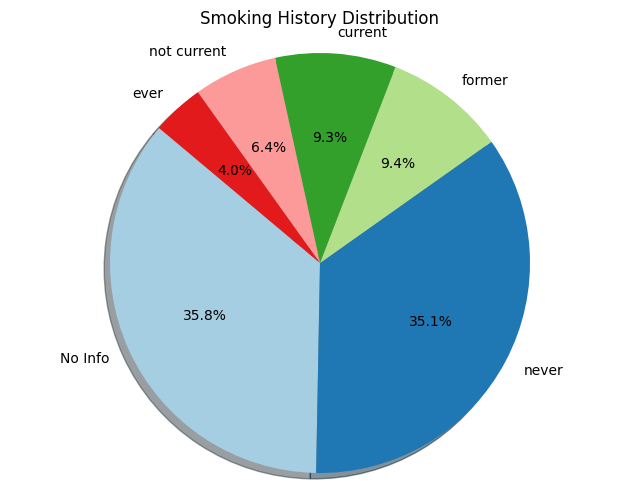

In [3]:
#Visualize entries that are missing/complete for different attributes.


# Count the occurrences of each category in 'smoking_history' column
smoking_counts = df['smoking_history'].value_counts()

# Data to plot
labels = smoking_counts.index
sizes = smoking_counts.values
colors = plt.cm.Paired(np.arange(len(labels)))  # Use a colormap for distinct colors

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) #These percentages are not rounded
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Smoking History Distribution')
plt.show()

# Analysis of Smoking History Column Entries  

The missing data (No Info) in the smoking history attribute makes up 35.8%. Maybe some patients did not want to answer about if they had a history of smoking or not, so it is not a mistake. This may affect data quality by making the data predictions not fully representative.

# Elimination

Our smoking history data has null values that are greater than 25%, so we chose to drop this entire column from our data with elimination.








In [4]:
df.drop('smoking_history', axis=1, inplace=True) #drop the smoking_history column from the dataframe
#axis 1 means we are dropping a col not a row
#inplace = True means the operation is done in place & the original dataframe is modified
df.info() #display the new dataframe without the smoking_history col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  object  
 1   age                  100000 non-null  category
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   bmi                  100000 non-null  category
 5   HbA1c_level          100000 non-null  category
 6   blood_glucose_level  100000 non-null  category
 7   diabetes             100000 non-null  int64   
dtypes: category(4), int64(3), object(1)
memory usage: 3.4+ MB


**Data visualization (4.5 pts)**

**Part 1:**

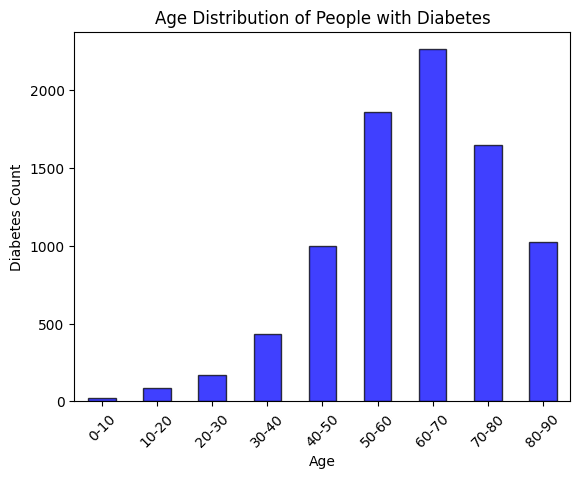

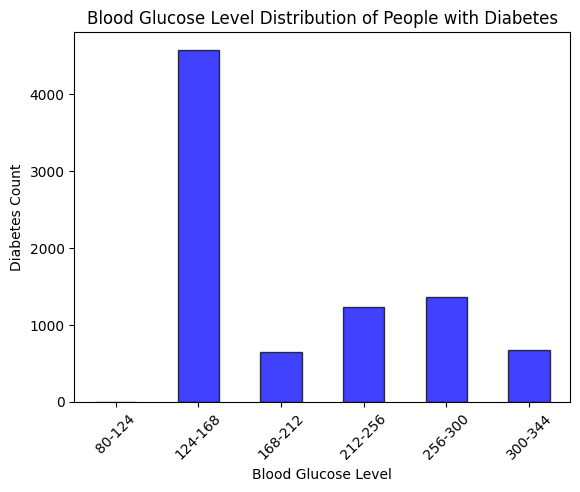

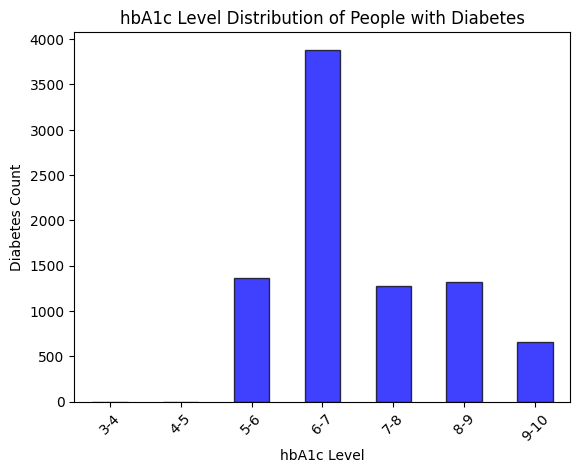

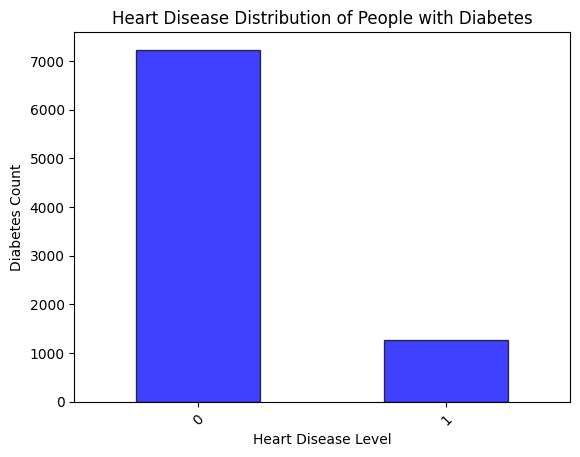

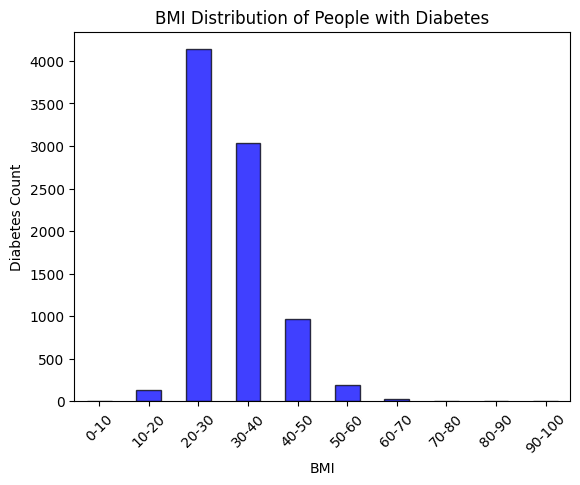

In [5]:
#Code for 5 plots

#Plot One - bar graph of age and diabetes

ages_with_diabetes = df[df['diabetes'] == 1]['age']

# Count the occurrences of each age bin
age_counts = ages_with_diabetes.value_counts().sort_index()

# Plot a bar chart
age_counts.plot(kind='bar', alpha=0.75, edgecolor='black', color='blue')

plt.title('Age Distribution of People with Diabetes')
plt.xlabel('Age')
plt.ylabel('Diabetes Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


#Plot two - blood glucose bar graph

bgl_with_diabetes = df[df['diabetes'] == 1]['blood_glucose_level']

# Count the occurrences of each age bin
bgl_counts = bgl_with_diabetes.value_counts().sort_index()

# Plot a bar chart
bgl_counts.plot(kind='bar', alpha=0.75, edgecolor='black', color='blue')

plt.title('Blood Glucose Level Distribution of People with Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


#Plot three - bar graph of hbA1c_level

hbA1c_with_diabetes = df[df['diabetes'] == 1]['HbA1c_level']

# Count the occurrences of each age bin
hbA1c_counts = hbA1c_with_diabetes.value_counts().sort_index()

# Plot a bar chart
hbA1c_counts.plot(kind='bar', alpha=0.75, edgecolor='black', color='blue')

plt.title('hbA1c Level Distribution of People with Diabetes')
plt.xlabel('hbA1c Level')
plt.ylabel('Diabetes Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

#Plot four - bar graph of Heart Disease

heart_disease_with_diabetes = df[df['diabetes'] == 1]['heart_disease']

# Count the occurrences of each age bin
heart_disease_counts = heart_disease_with_diabetes.value_counts().sort_index()

# Plot a bar chart
heart_disease_counts.plot(kind='bar', alpha=0.75, edgecolor='black', color='blue')

plt.title('Heart Disease Distribution of People with Diabetes')
plt.xlabel('Heart Disease Level')
plt.ylabel('Diabetes Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


#Plot five - bar graph of BMI

bmi_with_diabetes = df[df['diabetes'] == 1]['bmi']

# Count the occurrences of each age bin
bmi_counts = bmi_with_diabetes.value_counts().sort_index()

# Plot a bar chart
bmi_counts.plot(kind='bar', alpha=0.75, edgecolor='black', color='blue')

plt.title('BMI Distribution of People with Diabetes')
plt.xlabel('BMI')
plt.ylabel('Diabetes Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()



Graph Explanations:

1. Age Distribution of People with Diabetes.  

This graph communicates that diabetes cases increase as age increases all the way up to 60, but after age 60 the number decreases. People after 70 are dying so that could be the reason that the diabetes drops off.

2. Blood Glucose Level Distribution of People with Diabetes.

This graph shows that people with blood glucose in the range of 124-168 have the highest chance of getting Diabetes. Blood glucose lower than 124 means the person is close to the healthy 100 blood glucose level, so they should not have diabetes. Blood glucose over 168 can cause heart problems, and other issues with organs, that may affect people before they get diabetes.

3. HbA1c Level Distribution of People with Diabetes

This graph shows that people with HbA1c levels in the range 6-7 incur the most diabetes cases, which makes sense because people with 6.5-7% HbA1c level test for diabetes.

4. Heart Disease Distribution of People with Diabetes

This graph shows that heart disease has a no direct effect on diabetes because the 0 bar (Those who do not have heart disease) shows more diabetes cases than the 1 bar (Those who have heart disease).

5. BMI Distribution of People with Diabetes

People with 20-30 BMI have the most diabetes cases because BMI greater than or equal to 25 are obese. Our graph drops off because those with a BMI greater than 30 are at risk of heart attacks and other organ failures before they test for diabetes.



**Part 2 (2.5 pts):**

1.People in what range of age is most likely to get diabetes?

According to the bar graph, people with age from 60-70 is most likely to get diabetes.

2.People in what range of bmi is most likely to get diabetes?

According to the bar graph, people with bmi from 20-30 is most likely to get diabetes.

3.Do people that have heart disease have a higher chance of getting diabetes?

No, according to the bar graph, people without heart disease have more diabetes cases than people with heart disease.


**Exceptional Work:** (1 points total)

[0.4 points] The overall quality of the report as a coherent, useful, and polished product will be reflected here. Does it make sense overall? Do your visualizations answer the questions you put forth in your business analysis? Do you properly and consistently cite sources and annotate changes made to base code? Do you provide specific reasons for your assumptions? Do subsequent questions follow naturally from initial exploration?

The report provided gives an overview of a diabetes prediction dataset and includes an analysis of different variables in relation to diabetes, such as age, BMI, blood glucose level, heart disease, and smoking history. The analysis uses visualizations to represent the distribution of these variables among individuals with diabetes, which serves to address specific questions related to the business understanding of the dataset.

In terms of coherence, the report has a clear goal to analyze how different health-related features impact diabetes, which is crucial for predictive modeling aimed at medical industry stakeholders. It also sets an accuracy benchmark based on industry standards. The visualizations are designed to provide insights into the connections between health metrics and diabetes, potentially serving as a valuable resource for healthcare professionals. Also, the effectiveness of the visualizations allow to do a good interpretation of the data. Therefore, the visualizations are reported to address the initial questions posed. In addition, the report shows explicitly citations and detailed annotations for external data sources and methodologies, which is essential for scientific rigor.

These assumptions that are made within the report are based on logical reasoning or are presented as hypotheses, though these need to be backed by empirical evidence or further analysis. Regarding the flow and natural progression, the report progresses logically from defining the problem to data analysis and interpretation, with the final questions relating back to the initial analysis. According to the missing data handling, the smoking history column was dropped due to extensive missing data with null values greater than 25%. Finally, the report correctly identifies the need to categorize certain data types for proper preprocessing.

- **Specific Feedback**:
  - The interpretations of the data, especially regarding age and BMI, would benefit from additional evidence or literature support.
  - The conclusion that heart disease doesn't directly affect diabetes may need reevaluation to consider other influencing factors.

To summarize, the report has been thoughtfully structured to provide a comprehensive and insightful analysis, which can prove to be immensely helpful in predicting the likelihood of diabetes.


[0.6 Points] Additional analysis:
5000 level students: You have free rein to provide any additional analyses.


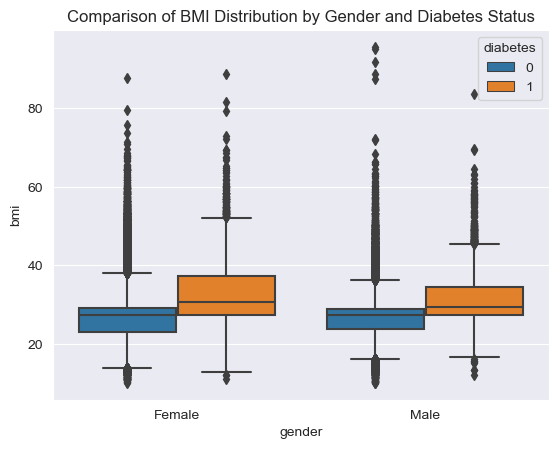

**Is there a significant difference in BMI distribution between diabetic and non-diabetic individuals across different genders?**

Analyze the interquartile ranges (IQR), medians, and outliers in the boxplot for both males and females with and without diabetes (denoted by diabetes '0' for non-diabetic and '1' for diabetic). Determine if diabetic individuals tend to have higher BMI values compared to non-diabetic individuals within each gender. This would involve observing the median BMI values of the orange boxes (diabetes = 1) against the blue boxes (diabetes = 0) for both genders. If the medians of the orange boxes are noticeably higher than those of the blue boxes, it could indicate that higher BMI is associated with diabetes.

* **Outliers:** Are there more extreme BMI values among diabetic individuals compared to non-diabetic individuals?
Width of the Boxplots: A wider interquartile range in one group could suggest more variability in BMI among its individuals. In the context of the graph, if there are more dots at higher BMI values for the orange boxes (diabetes = 1) than for the blue boxes (diabetes = 0), this would suggest that individuals with diabetes tend to have more extreme BMI values.

* **Overlap between Boxes:** Considerable overlap might suggest that while BMI is a factor, it's not the only one affecting the diabetes status. In the context of the graph, if the orange and blue boxes have a large area of overlap, it indicates that while there might be a trend of higher BMI among diabetics, BMI alone does not clearly distinguish between individuals with and without diabetes. This could suggest that other factors in addition to BMI contribute to the likelihood of having diabetes.

* **Width of the Boxplots:** A wider interquartile range in one group could suggest more variability in BMI among its individuals.In the context of the graph, a wider box (greater IQR) for one group suggests there's a greater spread in the BMI values among its members. For example, if the orange box is wider than the blue one for either gender, it means there's more variability in BMI among diabetics than non-diabetics.